## Guest Lecture COMP7230
# Using Python packages for spatial Linked Data data
#### by Dr Nicholas Car

This Notebook is the resource used to deliver a guest lecture for the [Australian National University](https://www.anu.edu.au)'s course [COMP7230](https://programsandcourses.anu.edu.au/2020/course/COMP7230): *Introduction to Programming for Data Scientists*

Click here to run this lecture in your web browser:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nicholascar/comp7230-training/HEAD?filepath=lecture_01.ipynb)

## About the lecturer
**Nicholas Car**:
* PhD in informatics for irrigation
* A former CSIRO informatics researcher
    * worked on integrating environmental data across government / industry
    * developed data standards
* Has worked in operational IT in government
* Now runs a private IT consulting company, [Kurrawong AI](https://kurrawong.net) supplying Data Science solutions

Relevant current work:

* building data processing systems for government & industry
* mainly using Python
    * due to its large number of web and data science packages
* maintains the [RDFlib](https://rdflib.net) Python toolkit
    * for processing [RDF](https://en.wikipedia.org/wiki/Resource_Description_Framework)
* co-chairs the [Australian Government Linked Data Working Group](https://www.linked.data.gov.au)
    * plans for multi-agency data integration
* still developing data standards
    * in particular [GeoSPARQL 1.1](https://opengeospatial.github.io/ogc-geosparql/geosparql11/spec.html)
        * for graph representations of spatial information


## 0. Lecture Outline
1. Notes about this training material
2. Background Concepts
3. Accessing RDF data
4. Parsing RDF data
5. Data 'mash up'
6. Data Conversions & Display


## 1. Notes about this training material
* This is a Jupyter Notebook - interactive Python scripting
* You will cover Jupyter Notebooks more, later in this course
* Access this material online at:
    * GitHub: <https://github.com/nicholascar/comp7230-training>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nicholascar/comp7230-training/?filepath=lecture_01.ipynb)

## 2. Background Concepts
### 2.1 Knowledge Graphs & RDF
_Nick will talk about RDF using these web pages:_

* [Semantic Web](https://www.w3.org/standards/semanticweb/) - the concept
* [Knowledge Graph](https://en.wikipedia.org/wiki/Knowledge_graph)
    * IBM's version: <https://www.ibm.com/cloud/learn/knowledge-graph>
* [RDF](https://en.wikipedia.org/wiki/Resource_Description_Framework) - the data model
    * refer to the RDF image below
* [RDFlib](https://rdflib.net) - the (Python) toolkit
* [RDFlib training Notebooks are available](https://github.com/nicholascar/rdflib-training)

RDF image, from [the RDF Primer](https://www.w3.org/TR/rdf11-primer/), for discussion:

![](./lecture_resources/img/example-graph-iris.jpg)

### 2.2 Australian national spatial datasets in RDF

![LocI Logo](./lecture_resources/img/LocI.png)

The LocI & FSDF DAA projects:
* The Location Index project: <https://www.ga.gov.au/locationindex>
* FSDF DAA's "Supermodel"
    * <https://geoscienceaustralia.github.io/fsdf-supermodel/supermodel.html>
* Knowledge Graph spatial data: [GeoSPARQL](https://opengeospatial.github.io/ogc-geosparql/geosparql11/spec.html#_core)
* Operational APIs:
    * ASGS: <https://asgs.linked.fsdf.org.au/dataset/asgsed3/collections>
    * GNAF: <https://gnaf.linked.fsdf.org.au/dataset/gnaf/collections>
    * there are others too!

### 2.3 KG summary
* _everything_ is "strongly" identified
    * including all relationships
    * unlike lots of related data
* many of the identifiers resolve
    * to more info on the web
* KG spatial data looks a lot like regular spatial data
    * but it's connected to other things in a defined way

## 3. Accessing RDF data
* Here we use the API for the Geocoded National Address File for Australia for Address data
    * Addresses Collection: <https://gnaf.linked.fsdf.org.au/dataset/gnaf/collections/address>
* GNAF-LD Data is presented according to *Linked Data* principles
    * online
    * in HTML & machine-readable form, RDF
    * RDF is a Knowledge Graph: a graph containing data + model
    * each resource is available via a IRI
        * e.g. <https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933>

![GAACT714845933](./lecture_resources/img/GAACT714845933.png)

### 3.1. Use local RDF data
Some setup imports

In [ ]:
import httpx
import rdflib
from rdflib.namespace import DCTERMS, GEO, RDF, RDFS

RDF can be stored in files in multiple formats optimised for different purposes.

A commonly-used format is JSON-LD - a JSON encoding of RDF. Let's parse a JSON-LD data file for the address GAACT714845933 into an in-memory graph and print out the number of triples.

In [ ]:
print(open("./lecture_resources/GAACT714845933.json-ld").read())


### 3.2. Get Address GAACT714845933 data online using the *httpx* package

In [5]:
r = httpx.get(
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933",
    follow_redirects=True
)
print(r.text.strip())

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <!-- standard Prez stylesheet -->
    <link rel="stylesheet" href="/static/css/prez.css">
    <!-- if a theme is set, also load it's favicon & stylesheet -->
    
        <link rel="stylesheet" href="/theme/css/theme.css">
        
            <link rel="shortcut icon" href="/static/img/favicon.ico" type="image/x-icon">
        
        
    
    <script src="https://kit.fontawesome.com/c112c4b9c0.js" crossorigin="anonymous"></script>
    <title>Geocoded National Address File Linked Data API</title>
</head>
<body>
    <header>
    <div id="header-content">
        <h1>Geocoded National Address File Linked Data API</h1>
    </div>
</header>
    <div id="breadcrumbs">
    <div id="breadcrumbs-container">
        
        <ol id="breadcrumbs-content">
            <li class="breadcrumb"><a

Not so easy to use the HTML we got above!

### 3.3 Get machine-readable data, RDF in JSON-LD
Use HTTP Content Negotiation to get the same JSON-LD as stored locally
Same IRI, different *format* of data

In [ ]:
r = httpx.get(
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933",
    headers={"Accept": "application/ld+json"},
    follow_redirects=True
)
print(r.text)

Let's get a different RDF format...

### 3.4 Get machine-readable data, Turtle. Easier to read

In [ ]:
r = httpx.get(
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933",
    headers={"Accept": "text/turtle"},
    follow_redirects=True
)
print(r.text)

## 4. Parsing RDF data

### 4.1 Using RDF tools - RDFLib
Import the RDFlib library for manipulating RDF data

Add some namespaces to shorten IRIs

In [2]:
ADDR = rdflib.Namespace("http://w3id.org/profile/anz-address/")
print(GEO)

http://www.opengis.net/ont/geosparql#


Create a graph and add the namespaces to it

In [3]:
g = rdflib.Graph(bind_namespaces="core") # RDF & RDFS added
g.bind("addr", ADDR)
g.bind("geo", GEO)
print(g)

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'Memory']].


Parse in the machine-readable data - JSON-LD RDF - from the GNAF online

In [ ]:
r = httpx.get(
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933",
    headers={"Accept": "application/ld+json"},
    follow_redirects=True
)
g.parse(data=r.text, format="json-ld")
print(len(g))

> Why is this so much better than parsing ordinary CSV?
> What are the main KG advantages?
>
> * strong definitions
> * universal models
> * extensible models
> * tooling for instance parsing
> * easily queryable results

Print graph content, in a different format from that which we got - Turtle

In [ ]:
print(g.serialize())

### 4.2 Getting multi-address data:
4.2.1. Retrieve a list of 20 addresses, in RDF
4.2.2. Get individual object data from a list
4.2.3. Get only the street address and map coordinates
4.2.4. Convert CSV data to PANDAS DataFrame
4.2.5. SPARQL querying RDF data

* The GNAF has ~14.5M Addresses in it
* The Linked Data APIs we are using page data: <http://gnaf.linked.fsdf.org.au/dataset/gnaf/collections/address/items?page=1>

#### 4.2.1. Retrieve a list of objects (1 page)

In [ ]:
g = rdflib.Graph()

r = httpx.get(
    "http://gnaf.linked.fsdf.org.au/dataset/gnaf/collections/address/items?_profile=mem&_mediatype=text/turtle",
    headers={"Accept": "text/turtle"},
    follow_redirects=True
)
g.parse(data=r.text)
print(len(g))

This list is also in RDF!

Show the IDs of first few by looping through the graph

In [ ]:
for i, t in enumerate(g.triples((None, RDFS.member, None))):
    print(f'Address {i+1}: {t[2].split("/")[-1]}')
    if i > 4:
        break

#### 4.2.2. Get individual object data from a list

For each Address in a list, retrieve it's RDF from the API online.

In [6]:
g = rdflib.Graph()
g.bind("addr", ADDR)
g.bind("geo", GEO)

addresses = [
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845944",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845934",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845943",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845949",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845955",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845935",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845947",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845950",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845953",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845945",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845946",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845939",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845941",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845942",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845954",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845952",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845938",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845936",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845951",
]
for address in addresses:
    r = httpx.get(
        address,
        headers={"Accept": "text/turtle"},
        follow_redirects=True
    )
    g.parse(data=r.text, format="turtle")
    print(f"Getting {address}...")
    print(len(g))

Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845944...
48
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845934...
80
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845943...
111
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845949...
140
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845955...
171
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845935...
200
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845947...
229
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845950...
258
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933...
289
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845953...
319
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845945...
348
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845946...
377
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT71484

Let's merge in some local data

In [8]:
print(f"Before merge, graph length: {len(g)}")
g.parse("./lecture_resources/address_geometries.ttl")
print(f"After merge, graph length: {len(g)}")

Before merge, graph length: 611
After merge, graph length: 711


#### 4.2.3. Extract (& print) street address text & coordinates
As CSV...

In [9]:
addresses_tsv = "id\tcoordinates\n"
for s, p, o in g.triples((None, RDF.type, ADDR.Address)):
    id = g.value(s, DCTERMS.identifier)
    coords = ""
    for s2, p2, o2 in g.triples((s, ADDR.hasQualifiedGeometry, None)):
        for s3, p3, o3 in g.triples((o2, GEO.hasGeometry, None)):
            for s4, p4, o4 in g.triples((o3, GEO.asWKT, None)):
                coords = str(o4).strip()

    addresses_tsv += "{}\t{}\n".format(id, coords)

print(addresses_tsv)

GNAF ID	Coordinates
GAACT714845944	POINT (149.0687229 -35.37847955)
GAACT714845934	POINT (149.0401187 -35.19989093)
GAACT714845943	POINT (149.0368852 -35.19795303)
GAACT714845949	POINT (149.06908395 -35.37882495)
GAACT714845955	POINT (149.03046282 -35.20202762)
GAACT714845935	POINT (149.03640841 -35.19777173)
GAACT714845947	POINT (149.03705032 -35.19796828)
GAACT714845950	POINT (149.03049843 -35.20169346)
GAACT714845933	POINT (149.03865604 -35.20113263)
GAACT714845953	POINT (149.06864966 -35.37733591)
GAACT714845945	POINT (149.03047333 -35.20156767)
GAACT714845946	POINT (149.06895786 -35.37862878)
GAACT714845939	POINT (149.03661902 -35.19784933)
GAACT714845941	POINT (149.06860919 -35.37833726)
GAACT714845942	POINT (149.04029706 -35.19999611)
GAACT714845954	POINT (149.03048051 -35.20185603)
GAACT714845952	POINT (149.03721725 -35.19805563)
GAACT714845938	POINT (149.06851657 -35.37815855)
GAACT714845936	POINT (149.03687042 -35.2039574)
GAACT714845951	POINT (149.06946494 -35.37908886)



#### 4.2.4. Convert CSV data to PANDAS DataFrame

In [10]:
import pandas
from io import StringIO
s = StringIO(addresses_tsv)
df1 = pandas.read_csv(s, sep="\t")
print(df1)


           GNAF ID                        Coordinates
0   GAACT714845944   POINT (149.0687229 -35.37847955)
1   GAACT714845934   POINT (149.0401187 -35.19989093)
2   GAACT714845943   POINT (149.0368852 -35.19795303)
3   GAACT714845949  POINT (149.06908395 -35.37882495)
4   GAACT714845955  POINT (149.03046282 -35.20202762)
5   GAACT714845935  POINT (149.03640841 -35.19777173)
6   GAACT714845947  POINT (149.03705032 -35.19796828)
7   GAACT714845950  POINT (149.03049843 -35.20169346)
8   GAACT714845933  POINT (149.03865604 -35.20113263)
9   GAACT714845953  POINT (149.06864966 -35.37733591)
10  GAACT714845945  POINT (149.03047333 -35.20156767)
11  GAACT714845946  POINT (149.06895786 -35.37862878)
12  GAACT714845939  POINT (149.03661902 -35.19784933)
13  GAACT714845941  POINT (149.06860919 -35.37833726)
14  GAACT714845942  POINT (149.04029706 -35.19999611)
15  GAACT714845954  POINT (149.03048051 -35.20185603)
16  GAACT714845952  POINT (149.03721725 -35.19805563)
17  GAACT714845938  POINT (1

#### 4.2.5. SPARQL querying RDF data
A graph query, similar to a database SQL query, can traverse the graph and retrieve the same details as the multiple
loops and Python code above in 3.1.3.

In [11]:
q = """
PREFIX addr: <http://w3id.org/profile/anz-address/>
SELECT ?id ?coords
WHERE {
    ?iri dcterms:identifier ?id .

    ?iri addr:hasQualifiedGeometry/geo:hasGeometry/geo:asWKT ?coords .
}
ORDER BY ?id
"""
for r in g.query(q):
    print("{}, {}".format(r["id"], r["coords"]))

GAACT714845933, POINT (149.03865604 -35.20113263)
GAACT714845934, POINT (149.0401187 -35.19989093)
GAACT714845935, POINT (149.03640841 -35.19777173)
GAACT714845936, POINT (149.03687042 -35.2039574)
GAACT714845938, POINT (149.06851657 -35.37815855)
GAACT714845939, POINT (149.03661902 -35.19784933)
GAACT714845941, POINT (149.06860919 -35.37833726)
GAACT714845942, POINT (149.04029706 -35.19999611)
GAACT714845943, POINT (149.0368852 -35.19795303)
GAACT714845944, POINT (149.0687229 -35.37847955)
GAACT714845945, POINT (149.03047333 -35.20156767)
GAACT714845946, POINT (149.06895786 -35.37862878)
GAACT714845947, POINT (149.03705032 -35.19796828)
GAACT714845949, POINT (149.06908395 -35.37882495)
GAACT714845950, POINT (149.03049843 -35.20169346)
GAACT714845951, POINT (149.06946494 -35.37908886)
GAACT714845952, POINT (149.03721725 -35.19805563)
GAACT714845953, POINT (149.06864966 -35.37733591)
GAACT714845954, POINT (149.03048051 -35.20185603)
GAACT714845955, POINT (149.03046282 -35.20202762)


The query above uses a fancy 'path follower' clause: `addr:hasQualifiedGeometry/geo:hasGeometry/geo:asWKT`

## 5. Data 'mash up'
Add some fake data to the GNAF data - people count per address.

The GeoSPARQL model extension used is:

![](./lecture_resources/img/geosparql-model-extension.png)

Note that for real Knowledge Graph work, the `xxx:` properties and classes would be "properly defined", removing any ambiguity of use.

In [50]:
import pandas
df2 = pandas.read_csv('./lecture_resources/fake_data.csv')
print(df2)

                id  persons
0   GAACT714845944        3
1   GAACT714845934        5
2   GAACT714845943       10
3   GAACT714845949        1
4   GAACT714845955        2
5   GAACT714845935        1
6   GAACT714845947        4
7   GAACT714845950        3
8   GAACT714845933        4
9   GAACT714845953        2
10  GAACT714845945        3
11  GAACT714845946        3
12  GAACT714845939        4
13  GAACT714845941        2
14  GAACT714845942        1
15  GAACT714845954        0
16  GAACT714845952        5
17  GAACT714845938        3
18  GAACT714845936        4
19  GAACT714845951        3


Merge DataFrames

In [51]:
df3 = pandas.merge(df1, df2)
print(df3.head())

               id                        coordinates  persons
0  GAACT714845944   POINT (149.0687229 -35.37847955)        3
1  GAACT714845934   POINT (149.0401187 -35.19989093)        5
2  GAACT714845943   POINT (149.0368852 -35.19795303)       10
3  GAACT714845949  POINT (149.06908395 -35.37882495)        1
4  GAACT714845955  POINT (149.03046282 -35.20202762)        2


## 6. Spatial Data Conversions & Display

Often you will want to display or export data.

#### 6.1 Basic plot display
Using standard Python plotting (matplotlib).

First, extract longitudes & latitudes

In [52]:
import re
addresses_csv = "id,lon,lat\n"

q = """
    PREFIX addr: <http://w3id.org/profile/anz-address/>
    SELECT ?id ?coords
    WHERE {
        ?iri dcterms:identifier ?id .

        ?iri addr:hasQualifiedGeometry/geo:hasGeometry/geo:asWKT ?coords .
    }
    ORDER BY ?id
    """
for r in g.query(q):
    match = re.search("POINT\s\((\d+\.\d+)\s(\-\d+\.\d+)\)", r["coords"])
    long = float(match.group(1))
    lat = float(match.group(2))
    addresses_csv += f'\"{r["id"]}\",{long},{lat}\n'

print(addresses_csv)

id,lon,lat
"GAACT714845933",149.03865604,-35.20113263
"GAACT714845933",149.03865604,-35.20113263
"GAACT714845933",149.03865604,-35.20113263
"GAACT714845934",149.0401187,-35.19989093
"GAACT714845934",149.0401187,-35.19989093
"GAACT714845934",149.0401187,-35.19989093
"GAACT714845935",149.03640841,-35.19777173
"GAACT714845935",149.03640841,-35.19777173
"GAACT714845935",149.03640841,-35.19777173
"GAACT714845936",149.03687042,-35.2039574
"GAACT714845936",149.03687042,-35.2039574
"GAACT714845936",149.03687042,-35.2039574
"GAACT714845938",149.06851657,-35.37815855
"GAACT714845938",149.06851657,-35.37815855
"GAACT714845938",149.06851657,-35.37815855
"GAACT714845939",149.03661902,-35.19784933
"GAACT714845939",149.03661902,-35.19784933
"GAACT714845939",149.03661902,-35.19784933
"GAACT714845941",149.06860919,-35.37833726
"GAACT714845941",149.06860919,-35.37833726
"GAACT714845941",149.06860919,-35.37833726
"GAACT714845942",149.04029706,-35.19999611
"GAACT714845942",149.04029706,-35.19999611
"GAACT

Put this new CSV data into a dataframe

In [53]:
df4 = pandas.read_csv(StringIO(addresses_csv))
print(df4.head())

               id         lon        lat
0  GAACT714845933  149.038656 -35.201133
1  GAACT714845933  149.038656 -35.201133
2  GAACT714845933  149.038656 -35.201133
3  GAACT714845934  149.040119 -35.199891
4  GAACT714845934  149.040119 -35.199891


Merge in the persons data

In [54]:
df5 = pandas.merge(df4, df2)
print(df5.head())

               id         lon        lat  persons
0  GAACT714845933  149.038656 -35.201133        4
1  GAACT714845933  149.038656 -35.201133        4
2  GAACT714845933  149.038656 -35.201133        4
3  GAACT714845934  149.040119 -35.199891        5
4  GAACT714845934  149.040119 -35.199891        5


Display

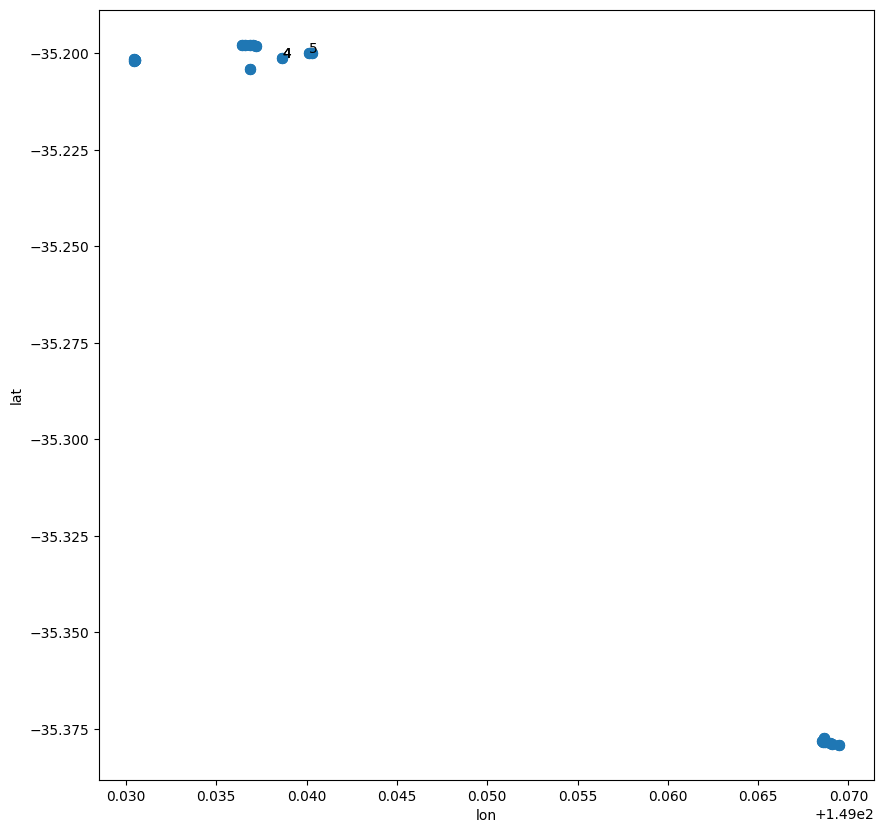

In [55]:
from matplotlib import pyplot as plt

df5.plot(kind="scatter", x="lon", y="lat", s=50, figsize=(10,10))

for i, label in enumerate(df5):
    plt.annotate(df5["persons"][i], (df5["lon"][i], df5["lat"][i]))
    
plt.show()

#### 5.2 Better map display
Just use a toolkit! - MapBox

First, convert data format to GeoJSON

In [58]:
addresses_geojson = []
for index, row in df5.iterrows():
    addresses_geojson.append({
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [row["lon"], row["lat"]]
        },
        "properties": {
            "id": row["id"],
            "persons": row["persons"]
        }
    })
addresses_geojson = {
    "type": "FeatureCollection", 
    "features": addresses_geojson
}
print(addresses_geojson)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [149.03865604, -35.20113263]}, 'properties': {'id': 'GAACT714845933', 'persons': 4}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [149.03865604, -35.20113263]}, 'properties': {'id': 'GAACT714845933', 'persons': 4}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [149.03865604, -35.20113263]}, 'properties': {'id': 'GAACT714845933', 'persons': 4}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [149.0401187, -35.19989093]}, 'properties': {'id': 'GAACT714845934', 'persons': 5}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [149.0401187, -35.19989093]}, 'properties': {'id': 'GAACT714845934', 'persons': 5}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [149.0401187, -35.19989093]}, 'properties': {'id': 'GAACT714845934', 'persons': 5}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coo

In [ ]:
token = "pk.eyJ1IjoibmljaG9sYXNjYXIiLCJhIjoiY2w3aWFkbXp2MDdrZjN2czMwMmYydmkwZiJ9.o-BIM9Fktde7bjgWZ8Ti5A"
import random
import os
import pandas as pd

from mapboxgl.utils import create_color_stops, df_to_geojson, create_numeric_stops
from mapboxgl.viz import CircleViz

viz = CircleViz(cdec_data,
                access_token=token,
                height='500px',
                label_property='id',
                color_property='Gage Type',
                color_default='grey',
                color_function_type='match',
                color_stops=category_color_stops,
                radius=2,
                center=(149.04, -35.25),
                zoom=5)

# Render map
viz.show()

Export the data and view it in a GeoJSON map viewer, such as http://geojsonviewer.nsspot.net/ or QGIS (desktop_.

## Concluding remarks

* Knowledge Graphs, realised through Linked Data, build a global machine-readable data system - the Seamntic Web
* the RDF data structure is used
    * to link things
    * to define things, and the links
* specialised parts of the Sem Web can represent a/any domain
    * e.g. spatial
    * e.g. Addresses
* powerful graph pattern matching queries, SPARQL, can be used to subset (federated) Sem Web data
* RDF manipulation libraries exist
    * can convert to other, common forms, e.g. CSV GeoJSON
* _do as much data science work as you can with well-defined models!_

## License
All the content in this repository is licensed under the [CC BY 4.0 license](https://creativecommons.org/licenses/by/4.0/). Basically, you can:

* copy and redistribute the material in any medium or format
* remix, transform, and build upon the material for any purpose, even commercially

You just need to:

* give appropriate credit, provide a link to the license, and indicate if changes were made
* not apply legal terms or technological measures that legally restrict others from doing anything the license permits

## Contact Information
**Dr Nicholas J. Car**<br />
*Data Systems Architect*<br />
[SURROUND Australia Pty Ltd](https://surroundaustralia.com)<br />
<nicholas.car@surroundaustralia.com><br />
GitHub: [nicholascar](https://github.com/nicholascar)<br />
ORCID: <https://orcid.org/0000-0002-8742-7730><br />